baca semua data

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset_1000.csv')

encode categorical column

In [2]:
print(data.dtypes)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
average price               float64
special requests              int64
booking status               object
dtype: object


In [3]:
object_columns = data.select_dtypes(include=['object']).columns.to_list()
print(object_columns)

['type of meal', 'room type', 'market segment type', 'booking status']


In [4]:
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print()

Unique values in 'type of meal':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2']

Unique values in 'room type':
['Room_Type 1' 'Room_Type 6' 'Room_Type 4' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7']

Unique values in 'market segment type':
['Offline' 'Online' 'Corporate' 'Complementary' 'Aviation']

Unique values in 'booking status':
['Canceled' 'Not_Canceled']



In [11]:
# Encoding untuk 'type of meal'
meal_plan_order = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2}
data['type of meal'] = data['type of meal'].map(meal_plan_order)

# Encoding untuk 'room type'
room_type_order = {
    'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 4': 4,
    'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7
}
data['room type'] = data['room type'].map(room_type_order)

# Encoding untuk 'market segment type'
market_segment_order = {
    'Offline': 0, 'Online': 1, 'Corporate': 2,
    'Complementary': 3, 'Aviation': 4
}
data['market segment type'] = data['market segment type'].map(market_segment_order)

# Encoding untuk 'booking status'
booking_status_order = {'Not_Canceled': 0, 'Canceled': 1}
data['booking status'] = data['booking status'].map(booking_status_order)


In [12]:
data.dtypes

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int64
car parking space             int64
room type                     int64
lead time                     int64
market segment type           int64
average price               float64
special requests              int64
booking status                int64
dtype: object

In [7]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,average price,special requests,booking status
0,2,0,0,2,1,0,1,177,0,100.0,0,1
1,1,0,0,2,1,0,1,172,0,95.0,0,1
2,2,0,2,2,0,0,1,105,1,108.0,1,1
3,2,0,2,3,1,0,1,143,1,100.3,0,1
4,3,0,1,1,1,0,1,33,2,95.0,0,0


In [13]:
data.to_csv('encoded_data.csv', index=False)

split datanya

In [8]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the data
shuffled_indices = np.random.permutation(len(data))

# Split the data
split_index = int(len(data) * 0.8)
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (800, 12)
Testing data shape: (200, 12)


In [9]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

                          number of adults  number of children  \
number of adults                  1.000000            0.005695   
number of children                0.005695            1.000000   
number of weekend nights          0.087130            0.075493   
number of week nights             0.082181            0.035895   
type of meal                      0.005695            0.046097   
car parking space                -0.041497            0.039789   
room type                         0.275723            0.434817   
lead time                         0.083591           -0.069113   
market segment type              -0.070132            0.069148   
average price                     0.311727            0.352828   
special requests                  0.191590            0.123418   
booking status                    0.075991            0.048671   

                          number of weekend nights  number of week nights  \
number of adults                          0.087130              

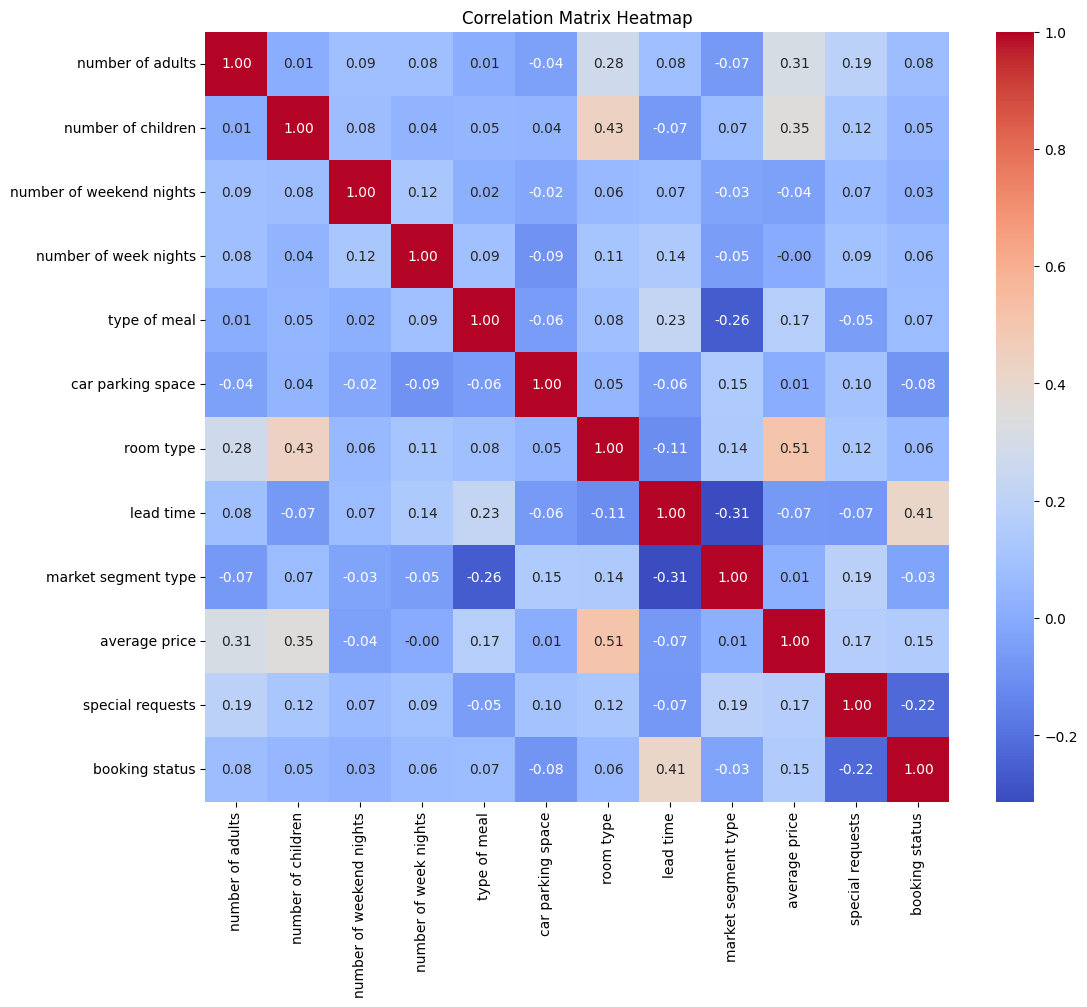

In [15]:
import seaborn as sns

correlation_matrix = data.corr()
print(correlation_matrix)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
train_data['booking status'].value_counts()

booking status
0    404
1    396
Name: count, dtype: int64